In [1]:
# Make plots interactive and enable inline backend
%matplotlib inline

In [2]:
# Import dependencies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# View data sets to read
os.listdir("data")

['clinicaltrial_data.csv', 'mouse_drug_data.csv']

In [4]:
# Read data sets into Pandas DataFrames
clinical_data = pd.read_csv("data/clinicaltrial_data.csv")
mouse_data = pd.read_csv("data/mouse_drug_data.csv")

# Preview data frames
display(clinical_data.head(3))
mouse_data.head(3)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0


,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn


In [5]:
# Check number of rows and nulls in both DataFrames
display(clinical_data.count())
mouse_data.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

Mouse ID    250
Drug        250
dtype: int64

In [6]:
# Merge the two original DataFrames into a new single DataFrame containing all research data
all_data = pd.merge(clinical_data, mouse_data, how="left", on="Mouse ID")

# Preview DataFrame
all_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


### Create a scatter plot that shows how the tumor volume changes over time for each treatment.

In [7]:
# Calculate mean of "Tumor Volume (mm3)" grouped by "Drug" and "Timepoint" 
tumor_vol_mean = all_data.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()

# Convert to, and flatten, DataFrame
tumor_vol_mean = pd.DataFrame(tumor_vol_mean).reset_index()

# Preview DataFrame
tumor_vol_mean.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [8]:
# Calculate standard error of the means for "Tumor Volume (mm3)" grouped by "Drug" and "Timepoint" 
tumor_vol_sem = all_data.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()

# Convert to, and flatten, DataFrame
tumor_vol_sem = pd.DataFrame(tumor_vol_sem).reset_index()

# Preview DataFrame
tumor_vol_sem.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [9]:
# Pivot mean and sem DataFrames
tumor_mean_pivot = tumor_vol_mean.pivot("Timepoint", "Drug", "Tumor Volume (mm3)")
tumor_sem_pivot = tumor_vol_sem.pivot("Timepoint", "Drug", "Tumor Volume (mm3)")

# Preview DataFrames
display(tumor_sem_pivot.head(3))
tumor_sem_pivot.head(3)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949


<ErrorbarContainer object of 3 artists>

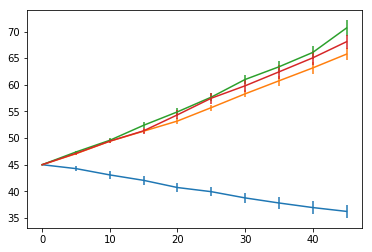

In [10]:
# Create figure and one subplot
fig, ax = plt.subplots()

# Generate the x-axis values
x_axis = np.arange(0, 50, 5)

# Draw error bars plot
ax.errorbar(x_axis, tumor_mean_pivot["Capomulin"], yerr=tumor_sem_pivot["Capomulin"])
ax.errorbar(x_axis, tumor_mean_pivot["Infubinol"], yerr=tumor_sem_pivot["Infubinol"])
ax.errorbar(x_axis, tumor_mean_pivot["Ketapril"], yerr=tumor_sem_pivot["Ketapril"])
ax.errorbar(x_axis, tumor_mean_pivot["Placebo"], yerr=tumor_sem_pivot["Placebo"])